In [1]:
import folium
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  # 맑은 고딕 폰트를 사용
plt.rcParams['axes.unicode_minus'] = False

In [5]:
DATA_PATH = "data"
df_pet_culture_facilities = pd.read_csv(f"{DATA_PATH}/한국문화정보원_전국 반려동물 동반 가능 문화시설 위치 데이터_20221130.CSV", encoding='cp949')

In [4]:
df_pet_culture_facilities = pd.read_csv(f"{DATA_PATH}/한국문화정보원_전국 반려동물 동반 가능 문화시설 위치 데이터_20221130.CSV", encoding='cp949')

In [6]:
df_pet_culture_cheonan = df_pet_culture_facilities[
    (df_pet_culture_facilities['시군구 명칭'] == '천안시 서북구') |
    (df_pet_culture_facilities['시군구 명칭'] == '천안시 동남구')
]
df_pet_culture_cheonan

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
202,365열린약국,반려동물업,반려의료,동물약국,충청남도,천안시 서북구,성정동,NaN,1292 번지,쌍용대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
374,가온동물병원,반려동물업,반려의료,동물병원,충청남도,천안시 동남구,청당동,NaN,153-15 번지,남부대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"일반동물병원, 고슴도치, 햄스터, 파충류 등 특수동물 진료 가능(조류 진료불가)",없음,2022-11-30
397,가을애견미용실,반려동물업,반려동물 서비스,미용,충청남도,천안시 서북구,쌍용동,NaN,1215 번지,쌍용대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,강아지미용,없음,2022-11-30
675,강아지마을,반려동물업,반려동물 서비스,미용,충청남도,천안시 서북구,쌍용동,NaN,1949 번지,쌍용12길,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"강아지용품, 강아지미용",없음,2022-11-30
797,개꿀이발소,반려동물업,반려동물 서비스,미용,충청남도,천안시 동남구,봉명동,NaN,39-17 번지,봉정로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,강아지미용,없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23721,힐링약국,반려동물업,반려의료,동물약국,충청남도,천안시 서북구,차암동,NaN,435-1 번지,3공단6로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
23742,힘찬약국,반려동물업,반려의료,동물약국,충청남도,천안시 동남구,신부동,NaN,625 번지,터미널9길,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
23790,CSO게코,반려동물업,반려동물 서비스,반려동물용품,충청남도,천안시 동남구,목천읍,신계리,422 번지,신계1길,...,없음,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"파충류 용품, 예약제",없음,2022-11-30
23809,DS애견동반카페,반려동물업,반려동물식당카페,카페,충청남도,천안시 동남구,병천면,탑원리,112-8 번지,유관순길,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,"애견카페, 운동장",없음,2022-11-30


In [7]:
selected_columns = ['시설명', '카테고리3', '시군구 명칭', '법정읍면동명칭', '리 명칭',
       '위도', '경도', '도로명주소',
       '반려동물 동반 가능정보', '반려동물 전용 정보', '입장 가능 동물 크기', '반려동물 제한사항', '장소(실내) 여부', '장소(실외)여부',
       '기본 정보_장소설명', '애견 동반 추가 요금', '최종작성일']
df_selected_cheonan = df_pet_culture_cheonan[selected_columns]
df_selected_cheonan

,시설명,카테고리3,시군구 명칭,법정읍면동명칭,리 명칭,위도,경도,도로명주소,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
202,365열린약국,동물약국,천안시 서북구,성정동,NaN,36.828373,127.138014,충청남도 천안시 서북구 쌍용대로 348,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
374,가온동물병원,동물병원,천안시 동남구,청당동,NaN,36.781186,127.154720,충청남도 천안시 동남구 남부대로 344,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"일반동물병원, 고슴도치, 햄스터, 파충류 등 특수동물 진료 가능(조류 진료불가)",없음,2022-11-30
397,가을애견미용실,미용,천안시 서북구,쌍용동,NaN,36.800122,127.131101,충청남도 천안시 서북구 쌍용대로 43-20,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,강아지미용,없음,2022-11-30
675,강아지마을,미용,천안시 서북구,쌍용동,NaN,36.802999,127.119569,충청남도 천안시 서북구 쌍용12길 10-4,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"강아지용품, 강아지미용",없음,2022-11-30
797,개꿀이발소,미용,천안시 동남구,봉명동,NaN,36.804470,127.139600,충청남도 천안시 동남구 봉정로 28,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,강아지미용,없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23721,힐링약국,동물약국,천안시 서북구,차암동,NaN,36.840979,127.103177,충청남도 천안시 서북구 3공단6로 50,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
23742,힘찬약국,동물약국,천안시 동남구,신부동,NaN,36.822799,127.157964,충청남도 천안시 동남구 터미널9길 50,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
23790,CSO게코,반려동물용품,천안시 동남구,목천읍,신계리,36.773428,127.193063,충청남도 천안시 동남구 목천읍 신계1길 41,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"파충류 용품, 예약제",없음,2022-11-30
23809,DS애견동반카페,카페,천안시 동남구,병천면,탑원리,36.760938,127.312933,충청남도 천안시 동남구 병천면 유관순길 99,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,"애견카페, 운동장",없음,2022-11-30


In [11]:
df_selected_cheonan['카테고리3'].unique()

array(['동물약국', '동물병원', '미용', '카페', '반려동물용품', '여행지', '박물관', '미술관', '문예회관'],
      dtype=object)

In [12]:
df_selected_cheonan['카테고리3'].value_counts()

카테고리3
동물약국      97
반려동물용품    75
동물병원      50
미용        35
카페        18
여행지       13
박물관        9
문예회관       3
미술관        2
Name: count, dtype: int64

In [27]:
df_pet_tourist_attraction = df_selected_cheonan[(df_selected_cheonan['카테고리3'] == '카페') |
                                         (df_selected_cheonan['카테고리3'] == '여행지')|
                                        (df_selected_cheonan['카테고리3'] == '문예회관')|
                                        (df_selected_cheonan['카테고리3'] == '박물관')|
                                         (df_selected_cheonan['카테고리3'] == '미술관')]
df_pet_tourist_attraction

,시설명,카테고리3,시군구 명칭,법정읍면동명칭,리 명칭,위도,경도,도로명주소,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
1523,고양이카페,카페,천안시 동남구,신부동,NaN,36.817136,127.156292,충청남도 천안시 동남구 먹거리8길 30,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"애견카페, 12세 미만 입장 불가",없음,2022-11-30
2654,꽃분이네애견카페,카페,천안시 동남구,신방동,NaN,36.775236,127.133303,충청남도 천안시 동남구 통정4로 22-25,동반가능,해당없음,15kg 미만,접종 완료 필수,실내 동반가능,실외 동반가능,애견카페,없음,2022-11-30
3409,능수버들공원,여행지,천안시 서북구,불당동,NaN,36.819062,127.106525,충청남도 천안시 서북구 불당26로 119,동반가능,해당없음,모두 가능,"목줄, 배변봉투",실내 동반불가,실외 동반가능,공원,없음,2022-11-30
5859,도계민화박물관,박물관,천안시 동남구,구성동,NaN,36.792796,127.172224,충청남도 천안시 동남구 정골1길 73-9,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,박물관,없음,2022-11-30
6123,도솔광장,여행지,천안시 동남구,신부동,NaN,36.824334,127.162963,충청남도 천안시 동남구 천안대로 844,동반가능,해당없음,모두 가능,목줄,실내 동반불가,실외 동반가능,관광지,없음,2022-11-30
6154,도펠하우스,카페,천안시 서북구,성거읍,문덕리,36.877775,127.175717,충청남도 천안시 서북구 성거읍 명우리길 74,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,애견카페,없음,2022-11-30
6165,독립기념관,박물관,천안시 동남구,목천읍,남화리,36.781872,127.230398,충청남도 천안시 동남구 목천읍 독립기념관로 1,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,박물관,없음,2022-11-30
6872,라벤투라,카페,천안시 동남구,유량동,NaN,36.813310,127.177043,충청남도 천안시 동남구 태조산길 120-5,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,애견카페,없음,2022-11-30
7319,리각미술관,미술관,천안시 동남구,유량동,NaN,36.820157,127.186286,충청남도 천안시 동남구 태조산길 245,동반가능,해당없음,모두 가능,야외만 반려동물 동반 가능,실내 동반가능,실외 동반가능,미술관,없음,2022-11-30
8785,물총새공원,여행지,천안시 서북구,불당동,NaN,36.809029,127.106342,NaN,동반가능,해당없음,모두 가능,"목줄, 배변봉투",실내 동반불가,실외 동반가능,공원,없음,2022-11-30


In [28]:
# 지도 생성 (중심 위치는 데이터의 평균 위도와 경도를 사용)
map_center = [df_pet_tourist_attraction['위도'].mean(), df_pet_tourist_attraction['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# 데이터프레임을 순회하며 마커 추가
for _, row in df_pet_tourist_attraction.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['시설명'],
        tooltip=row['시설명']
    ).add_to(mymap)

mymap

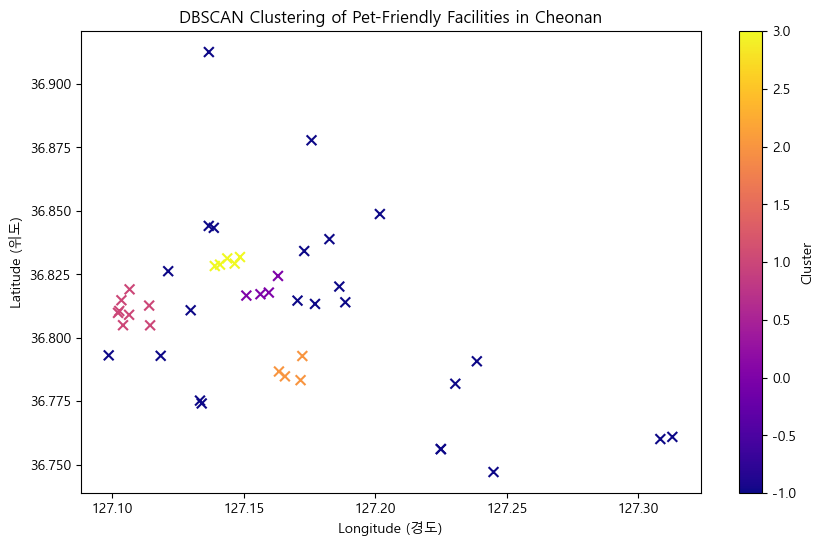

In [29]:
# Checking if '위도' and '경도' columns exist and are valid
if '위도' in df_pet_tourist_attraction.columns and '경도' in df_pet_tourist_attraction.columns:
    # Dropping rows where latitude or longitude is missing
    df_pet_tourist_attraction = df_pet_tourist_attraction.dropna(subset=['위도', '경도'])

    # Extracting latitude and longitude for clustering
    coordinates = df_pet_tourist_attraction[['위도', '경도']].values

    # Performing DBSCAN clustering
    dbscan = DBSCAN(eps=0.01, min_samples=3)  # Parameters may need adjustment based on the data distribution
    clusters = dbscan.fit_predict(coordinates)

    # Adding the cluster labels to the DataFrame
    df_pet_tourist_attraction['Cluster'] = clusters

    # Plotting the clustering results
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pet_tourist_attraction['경도'], df_pet_tourist_attraction['위도'], c=df_pet_tourist_attraction['Cluster'], cmap='plasma', s=50,  marker='x')
    plt.xlabel('Longitude (경도)')
    plt.ylabel('Latitude (위도)')
    plt.title('DBSCAN Clustering of Pet-Friendly Facilities in Cheonan')
    plt.colorbar(label='Cluster')
    plt.show()

else:
    print("Latitude ('위도') or Longitude ('경도') columns are missing or incorrectly named.")

In [44]:
# Define the center of the map as the average of the coordinates
map_center = [df_pet_tourist_attraction['위도'].mean(), df_pet_tourist_attraction['경도'].mean()]

# Create a map centered around Cheonan
m = folium.Map(location=map_center, zoom_start=13)

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue']

# Plot the facilities on the map
for idx, row in df_pet_tourist_attraction.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"Cluster: {row['Cluster']}",
        icon=folium.Icon(color=colors[row['Cluster'] % len(colors)], icon='info-sign')
    ).add_to(m)

# Display the map
m

## 충청남도 반려동물 관광지

In [23]:
df_pet_culture_chungnam = df_pet_culture_facilities[(df_pet_culture_facilities['시도 명칭'] == '충청남도')]
df_pet_culture_chungnam

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
188,365스마일약국,반려동물업,반려의료,동물약국,충청남도,홍성군,홍북읍,신경리,1188 번지,홍학로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
202,365열린약국,반려동물업,반려의료,동물약국,충청남도,천안시 서북구,성정동,NaN,1292 번지,쌍용대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
297,가나동물병원(논산),반려동물업,반려의료,동물병원,충청남도,논산시,연무읍,안심리,1-137 번지,안심로127번길,...,변동,동반가능,해당없음,대형,제한사항 없음,실내 동반가능,실외 동반불가,축산동물병원,없음,2022-11-30
301,가나동물병원(충남 아산),반려동물업,반려의료,동물병원,충청남도,아산시,온천동,NaN,80-5 번지,온천대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30
315,가든애견샵,반려동물업,반려동물 서비스,반려동물용품,충청남도,보령시,대천동,NaN,394-4 번지,중앙로,...,없음,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"강아지용품, 대형 사료",없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23742,힘찬약국,반려동물업,반려의료,동물약국,충청남도,천안시 동남구,신부동,NaN,625 번지,터미널9길,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
23790,CSO게코,반려동물업,반려동물 서비스,반려동물용품,충청남도,천안시 동남구,목천읍,신계리,422 번지,신계1길,...,없음,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"파충류 용품, 예약제",없음,2022-11-30
23809,DS애견동반카페,반려동물업,반려동물식당카페,카페,충청남도,천안시 동남구,병천면,탑원리,112-8 번지,유관순길,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,"애견카페, 운동장",없음,2022-11-30
23856,KU건국동물병원,반려동물업,반려의료,동물병원,충청남도,예산군,예산읍,산성리,669 번지,벚꽃로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30


In [24]:
selected_columns = ['시설명', '카테고리3', '시군구 명칭', '법정읍면동명칭', '리 명칭',
       '위도', '경도', '도로명주소',
       '반려동물 동반 가능정보', '반려동물 전용 정보', '입장 가능 동물 크기', '반려동물 제한사항', '장소(실내) 여부', '장소(실외)여부',
       '기본 정보_장소설명', '애견 동반 추가 요금', '최종작성일']
df_pet_culture_chungnam = df_pet_culture_chungnam[selected_columns]
df_pet_culture_chungnam

,시설명,카테고리3,시군구 명칭,법정읍면동명칭,리 명칭,위도,경도,도로명주소,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
188,365스마일약국,동물약국,홍성군,홍북읍,신경리,36.646846,126.676462,충청남도 홍성군 홍북읍 홍학로 95,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
202,365열린약국,동물약국,천안시 서북구,성정동,NaN,36.828373,127.138014,충청남도 천안시 서북구 쌍용대로 348,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
297,가나동물병원(논산),동물병원,논산시,연무읍,안심리,36.131606,127.098540,충청남도 논산시 연무읍 안심로127번길 14-1,동반가능,해당없음,대형,제한사항 없음,실내 동반가능,실외 동반불가,축산동물병원,없음,2022-11-30
301,가나동물병원(충남 아산),동물병원,아산시,온천동,NaN,36.780949,127.007337,충청남도 아산시 온천대로 1525,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30
315,가든애견샵,반려동물용품,보령시,대천동,NaN,36.352763,126.588249,충청남도 보령시 중앙로 143,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"강아지용품, 대형 사료",없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23742,힘찬약국,동물약국,천안시 동남구,신부동,NaN,36.822799,127.157964,충청남도 천안시 동남구 터미널9길 50,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
23790,CSO게코,반려동물용품,천안시 동남구,목천읍,신계리,36.773428,127.193063,충청남도 천안시 동남구 목천읍 신계1길 41,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"파충류 용품, 예약제",없음,2022-11-30
23809,DS애견동반카페,카페,천안시 동남구,병천면,탑원리,36.760938,127.312933,충청남도 천안시 동남구 병천면 유관순길 99,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,"애견카페, 운동장",없음,2022-11-30
23856,KU건국동물병원,동물병원,예산군,예산읍,산성리,36.694165,126.836326,충청남도 예산군 예산읍 벚꽃로 153,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30


In [26]:
df_pet_culture_chungnam['카테고리3'].value_counts()

카테고리3
동물약국      277
동물병원      200
반려동물용품    197
여행지        82
미용         66
박물관        57
펜션         45
카페         43
문예회관       18
미술관         7
위탁관리        1
Name: count, dtype: int64

In [36]:
df_pet_tourist_attraction_CN = df_pet_culture_chungnam[(df_pet_culture_chungnam['카테고리3'] == '펜션') |
                                                (df_pet_culture_chungnam['카테고리3'] == '카페') |
                                                (df_pet_culture_chungnam['카테고리3'] == '여행지')|
                                                (df_pet_culture_chungnam['카테고리3'] == '박물관')|
                                                (df_pet_culture_chungnam['카테고리3'] == '문예회관')|
                                                (df_pet_culture_chungnam['카테고리3'] == '미술관')]
df_pet_tourist_attraction_CN

,시설명,카테고리3,시군구 명칭,법정읍면동명칭,리 명칭,위도,경도,도로명주소,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
320,가락바위소류지,여행지,아산시,탕정면,명암리,36.807598,127.059415,NaN,동반가능,해당없음,모두 가능,"목줄, 배변봉투",실내 동반불가,실외 동반가능,관광지,없음,2022-11-30
489,강경젓갈전시관,여행지,논산시,강경읍,황산리,36.157556,127.009806,충청남도 논산시 강경읍 금백로 45,동반가능,해당없음,모두 가능,목줄,실내 동반불가,실외 동반가능,관광지,없음,2022-11-30
835,개리비안베이,펜션,태안군,소원면,법산리,36.755224,126.211853,충청남도 태안군 소원면 법산길 584-40,동반가능,해당없음,10kg 미만,"입질, 공격성 심한 경우, 맹견 입실 불가, 객실당 최대 4마리",실내 동반가능,실외 동반가능,애견 동반 펜션,"10,000원",2022-11-30
912,개스트하우스,카페,당진시,읍내동,NaN,36.901048,126.631978,충청남도 당진시 우두로 9,동반가능,해당없음,소형/중형,제한사항 없음,실내 동반가능,실외 동반불가,애견카페,없음,2022-11-30
914,개심사,여행지,서산시,운산면,신창리,36.746900,126.589969,충청남도 서산시 운산면 개심사로 321-86,동반가능,해당없음,모두 가능,"목줄, 배변봉투",실내 동반불가,실외 동반가능,관광지,없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,홍주문화회관,문예회관,홍성군,홍성읍,옥암리,36.594770,126.651896,충청남도 홍성군 홍성읍 내포로 164,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반불가,문예회관,없음,2022-11-30
23368,홍주성역사관,박물관,홍성군,홍성읍,오관리,36.600199,126.660920,충청남도 홍성군 홍성읍 아문길 20,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,박물관,없음,2022-11-30
23496,황산근린공원,여행지,논산시,강경읍,황산리,36.156469,127.009282,충청남도 논산시 강경읍 금백로 34,동반가능,해당없음,모두 가능,목줄,실내 동반불가,실외 동반가능,공원,없음,2022-11-30
23707,히든모먼츠,카페,천안시 동남구,성남면,신사리,36.747095,127.244927,충청남도 천안시 동남구 성남면 신사3길 42-19,동반가능,해당없음,모두 가능,목줄,실내 동반가능,실외 동반가능,애견카페,없음,2022-11-30


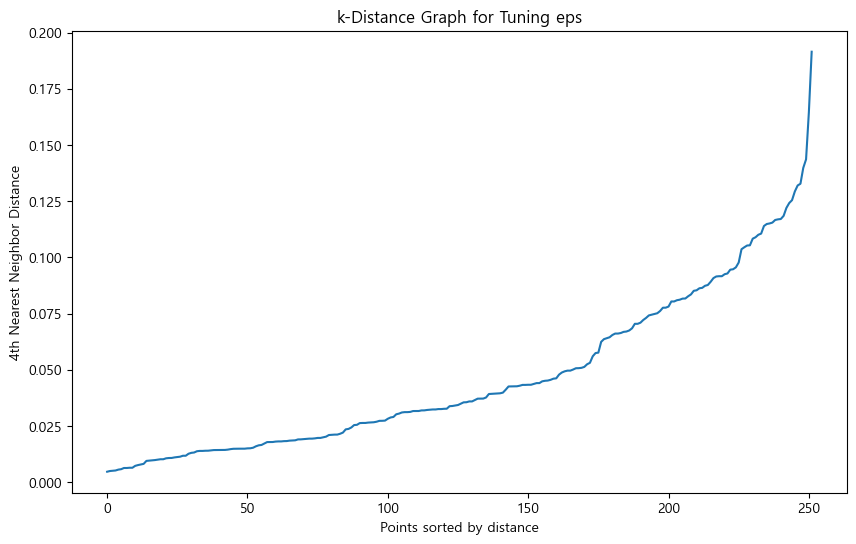

In [40]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 위도와 경도 데이터를 추출
coordinates = df_pet_tourist_attraction_CN[['위도', '경도']].values

# k-최근접 이웃 (k-nearest neighbors) 모델 생성
neighbors = NearestNeighbors(n_neighbors=5)  # 여기서 5는 일반적으로 사용되는 값이지만 상황에 따라 조정 가능
neighbors_fit = neighbors.fit(coordinates)
distances, indices = neighbors_fit.kneighbors(coordinates)

# k-거리 그래프 생성
distances = np.sort(distances[:, 4], axis=0)  # 4번째 이웃까지의 거리를 선택 (n_neighbors-1 번째 열)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('k-Distance Graph for Tuning eps')
plt.show()


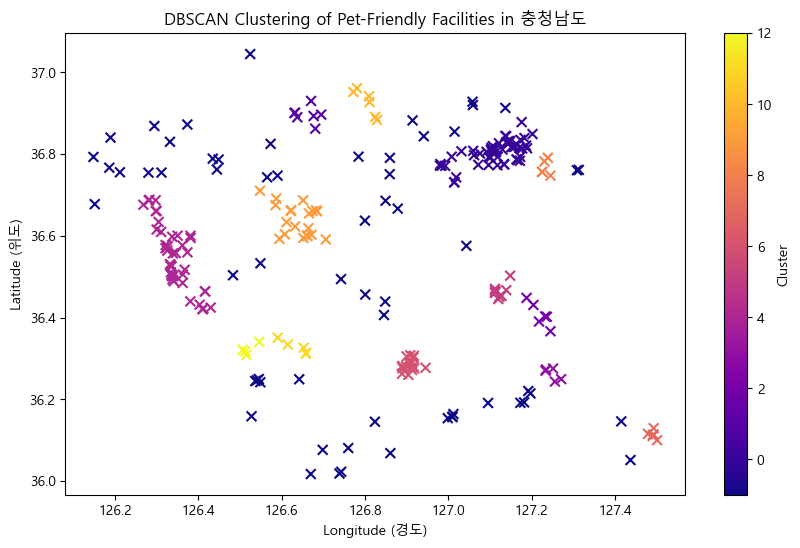

In [54]:
# Checking if '위도' and '경도' columns exist and are valid
if '위도' in df_pet_tourist_attraction_CN.columns and '경도' in df_pet_tourist_attraction_CN.columns:
    # Dropping rows where latitude or longitude is missing
    df_pet_tourist_attraction_CN = df_pet_tourist_attraction_CN.dropna(subset=['위도', '경도'])

    # Extracting latitude and longitude for clustering
    coordinates = df_pet_tourist_attraction_CN[['위도', '경도']].values

    # Performing DBSCAN clustering
    dbscan = DBSCAN(eps=0.05, min_samples=5)  # Parameters may need adjustment based on the data distribution
    clusters = dbscan.fit_predict(coordinates)

    # Adding the cluster labels to the DataFrame
    df_pet_tourist_attraction_CN['Cluster'] = clusters

    # Plotting the clustering results
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pet_tourist_attraction_CN['경도'], df_pet_tourist_attraction_CN['위도'], c=df_pet_tourist_attraction_CN['Cluster'], cmap='plasma', s=50,  marker='x')
    plt.xlabel('Longitude (경도)')
    plt.ylabel('Latitude (위도)')
    plt.title('DBSCAN Clustering of Pet-Friendly Facilities in 충청남도')
    plt.colorbar(label='Cluster')
    plt.show()

else:
    print("Latitude ('위도') or Longitude ('경도') columns are missing or incorrectly named.")

DBSCAN 성능평가 - 실루엣 점수

In [55]:
from sklearn.metrics import silhouette_score

# 필터링을 통해 클러스터 번호가 -1이 아닌 데이터만 사용
labels = df_pet_tourist_attraction_CN['Cluster']
mask = labels != -1  # 노이즈 데이터 (-1) 제외
filtered_data = df_pet_tourist_attraction_CN[mask]

# 실루엣 점수 계산
score = silhouette_score(filtered_data[['위도', '경도']], filtered_data['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6069918528717942


In [56]:
import folium

# Define the center of the map as the average of the coordinates
map_center = [df_pet_tourist_attraction_CN['위도'].mean(), df_pet_tourist_attraction_CN['경도'].mean()]

# Create a map centered around Cheonan
m = folium.Map(location=map_center, zoom_start=13)

# Define a limited set of Folium supported colors
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 
    'darkred', 'lightred', 'beige', 'darkblue', 
    'darkgreen', 'cadetblue', 'darkpurple', 
    'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black'
]

# Plot the facilities on the map
for idx, row in df_pet_tourist_attraction_CN.iterrows():
    cluster_idx = row['Cluster']
    
    # Check if the cluster index is negative (noise)
    if cluster_idx == -1:
        color = 'black'  # Assign a special color for noise
    else:
        # Use the predefined list of colors
        color = colors[cluster_idx % len(colors)]
    
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"Cluster: {row['Cluster']}",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(m)

# Display the map
m

## 경기도

In [57]:
df_pet_culture_gyeonggi = df_pet_culture_facilities[(df_pet_culture_facilities['시도 명칭'] == '경기도')]
df_pet_culture_gyeonggi

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
0,1004 약국,반려동물업,반려의료,동물약국,경기도,고양시 덕양구,동산동,NaN,352-1 번지,동세로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
2,100세건강약국,반려동물업,반려의료,동물약국,경기도,안양시 만안구,안양동,NaN,856-4 번지,안양로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
4,100세약국,반려동물업,반려의료,동물약국,경기도,수원시 팔달구,인계동,NaN,942-4 번지,경수대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
7,100평 광장약국,반려동물업,반려의료,동물약국,경기도,의정부시,금오동,NaN,441-65 번지,동일로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
19,21세기 동규약국,반려동물업,반려의료,동물약국,경기도,오산시,오산동,NaN,880-21 번지,대원로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,two현동물병원,반려동물업,반려의료,동물병원,경기도,평택시,동삭동,NaN,662-4 번지,평남로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30
23907,U1스마트약국,반려동물업,반려의료,동물약국,경기도,하남시,풍산동,NaN,618 번지,하남대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
23921,WE 동물병원,반려동물업,반려의료,동물병원,경기도,수원시 장안구,정자동,NaN,541-21 번지,파장로,...,변동,동반가능,해당없음,"모두 가능, 고양이, 포유류 특수동물, 파충류",제한사항 없음,실내 동반가능,실외 동반불가,"일반동물병원, 특수동물 진료 가능",없음,2022-11-30
23922,Wellness clinic 동물병원,반려동물업,반려의료,동물병원,경기도,용인시 기흥구,보정동,NaN,1019-488 번지,용구대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30


In [58]:
df_pet_culture_gyeonggi['카테고리3'].value_counts()

카테고리3
동물약국      2375
반려동물용품    1632
동물병원      1145
미용         650
카페         241
여행지        124
박물관        123
펜션          78
미술관         53
문예회관        44
위탁관리        17
식당           3
Name: count, dtype: int64

In [59]:
df_pet_tourist_attraction_GG = df_pet_culture_gyeonggi[(df_pet_culture_gyeonggi['카테고리3'] == '펜션') |
                                                (df_pet_culture_gyeonggi['카테고리3'] == '카페') |
                                                (df_pet_culture_gyeonggi['카테고리3'] == '여행지')|
                                                (df_pet_culture_gyeonggi['카테고리3'] == '박물관')|
                                                (df_pet_culture_gyeonggi['카테고리3'] == '문예회관')|
                                                (df_pet_culture_gyeonggi['카테고리3'] == '미술관')|
                                                (df_pet_culture_gyeonggi['카테고리3'] == '식당')]
df_pet_tourist_attraction_GG

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
314,가든블루,반려동물업,반려동반여행,펜션,경기도,포천시,이동면,장암리,636-12 번지,화동로,...,변동,동반가능,해당없음,10kg 이하,제한사항 없음,실내 동반가능,실외 동반가능,"애견 동반 펜션, 사전문의 필수","20,000원",2022-11-30
393,가원별장 펜션,반려동물업,반려동반여행,펜션,경기도,양평군,단월면,명성리,613-3 번지,명성길,...,변동,동반가능,해당없음,7kg 이하,제한사항 없음,실내 동반가능,실외 동반가능,"애견 동반 펜션, 사전문의 필수","20,000원",2022-11-30
401,가일미술관,반려동물업,반려동반여행,미술관,경기도,가평군,청평면,삼회리,609-6 번지,북한강로,...,3000원,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,미술관,없음,2022-11-30
424,가평 퓨어향기 독채펜션,반려동물업,반려동반여행,펜션,경기도,가평군,북면,적목리,166-2 번지,가화로,...,변동,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,펜션,없음,2022-11-30
426,가평문화예술회관,반려동물업,반려동반여행,문예회관,경기도,가평군,가평읍,대곡리,316 번지,문화로,...,변동,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반불가,문예회관,없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,hek,반려동물업,반려동물식당카페,카페,경기도,파주시,탄현면,법흥리,1652-503 번지,헤이리마을길,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,애견카페,없음,2022-11-30
23827,i like,반려동물업,반려동물식당카페,카페,경기도,구리시,수택동,NaN,423-17 번지,검배로,...,변동,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반불가,고양이 카페,없음,2022-11-30
23857,KUMA 계원예술대학교 미술관,반려동물업,반려동반여행,미술관,경기도,의왕시,내손동,NaN,768 번지,계원대학로,...,없음,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반불가,미술관,없음,2022-11-30
23872,ONSIDE 카페,반려동물업,반려동물식당카페,카페,경기도,남양주시,퇴계원읍,퇴계원리,329-17 번지,별내2로,...,4000원,동반가능,반려동물 전용,15kg 이하,"매너벨트, 5차 접종 필수, 대형견 및 진도견 불가",실내 동반가능,실외 동반가능,"애견카페, 미용, 호텔, 예약제, 노키즈존",없음,2022-11-30


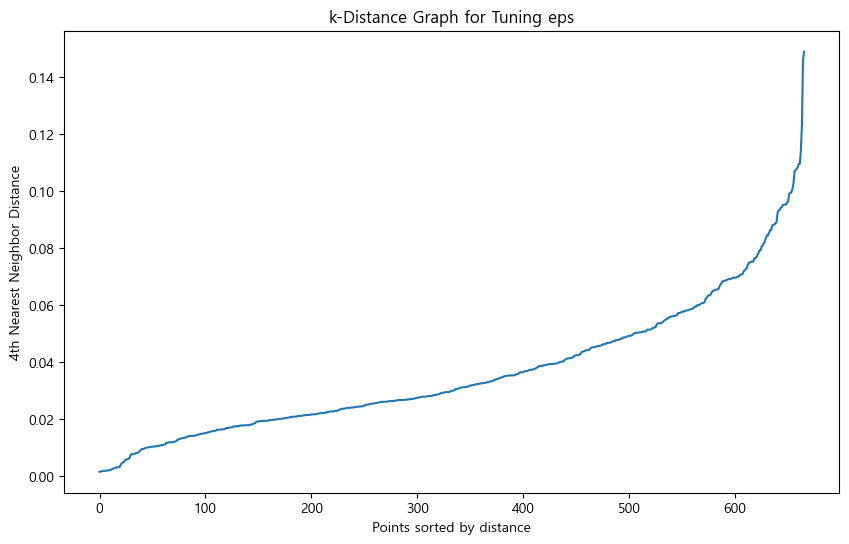

In [60]:
# 위도와 경도 데이터를 추출
coordinates = df_pet_tourist_attraction_GG[['위도', '경도']].values

# k-최근접 이웃 (k-nearest neighbors) 모델 생성
neighbors = NearestNeighbors(n_neighbors=5)  # 여기서 5는 일반적으로 사용되는 값이지만 상황에 따라 조정 가능
neighbors_fit = neighbors.fit(coordinates)
distances, indices = neighbors_fit.kneighbors(coordinates)

# k-거리 그래프 생성
distances = np.sort(distances[:, 4], axis=0)  # 4번째 이웃까지의 거리를 선택 (n_neighbors-1 번째 열)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('k-Distance Graph for Tuning eps')
plt.show()


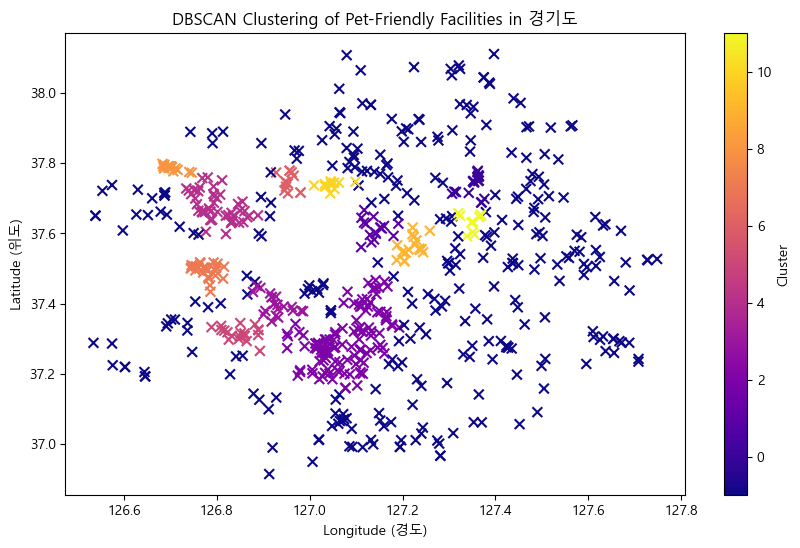

In [76]:
# Checking if '위도' and '경도' columns exist and are valid
if '위도' in df_pet_tourist_attraction_GG.columns and '경도' in df_pet_tourist_attraction_GG.columns:
    # Dropping rows where latitude or longitude is missing
    df_pet_tourist_attraction_GG = df_pet_tourist_attraction_GG.dropna(subset=['위도', '경도'])

    # Extracting latitude and longitude for clustering
    coordinates = df_pet_tourist_attraction_GG[['위도', '경도']].values

    # Performing DBSCAN clustering
    dbscan = DBSCAN(eps=0.04, min_samples=10)  # Parameters may need adjustment based on the data distribution
    clusters = dbscan.fit_predict(coordinates)

    # Adding the cluster labels to the DataFrame
    df_pet_tourist_attraction_GG['Cluster'] = clusters

    # Plotting the clustering results
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pet_tourist_attraction_GG['경도'], df_pet_tourist_attraction_GG['위도'], c=df_pet_tourist_attraction_GG['Cluster'], cmap='plasma', s=50,  marker='x')
    plt.xlabel('Longitude (경도)')
    plt.ylabel('Latitude (위도)')
    plt.title('DBSCAN Clustering of Pet-Friendly Facilities in 경기도')
    plt.colorbar(label='Cluster')
    plt.show()

else:
    print("Latitude ('위도') or Longitude ('경도') columns are missing or incorrectly named.")

In [77]:
from sklearn.metrics import silhouette_score

# 필터링을 통해 클러스터 번호가 -1이 아닌 데이터만 사용
labels = df_pet_tourist_attraction_GG['Cluster']
mask = labels != -1  # 노이즈 데이터 (-1) 제외
filtered_data = df_pet_tourist_attraction_GG[mask]

# 실루엣 점수 계산
score = silhouette_score(filtered_data[['위도', '경도']], filtered_data['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5198896235948559


In [78]:
import folium

# Define the center of the map as the average of the coordinates
map_center = [df_pet_tourist_attraction_GG['위도'].mean(), df_pet_tourist_attraction_GG['경도'].mean()]

# Create a map centered around Cheonan
m = folium.Map(location=map_center, zoom_start=13)

# Define a limited set of Folium supported colors
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 
    'darkred', 'lightred', 'beige', 'darkblue', 
    'darkgreen', 'cadetblue', 'darkpurple', 
    'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black'
]

# Plot the facilities on the map
for idx, row in df_pet_tourist_attraction_GG.iterrows():
    cluster_idx = row['Cluster']
    
    # Check if the cluster index is negative (noise)
    if cluster_idx == -1:
        color = 'black'  # Assign a special color for noise
    else:
        # Use the predefined list of colors
        color = colors[cluster_idx % len(colors)]
    
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"Cluster: {row['Cluster']}",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(m)

# Display the map
m